## Oversampling with SMOTE

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [2]:
# Load your dataset
# df = pd.read_csv("primary-dataset.csv")
# df = pd.read_csv("simulated_rwanda_primary_promotions_1996_2023_V5.csv")
df = pd.read_csv("simulated_rwanda_primary_promotions_1996_2023_V6.csv")

In [3]:
df.head(10)

,Student_ID,Kinyarwanda_P1,Kinyarwanda_P2,Kinyarwanda_P3,Kinyarwanda_P4,Kinyarwanda_P5,Kinyarwanda_P6,English_P1,English_P2,English_P3,...,School_Location,Residence_Location,Has_Electricity,Parental_Education_Level,Attendance_Rate,Nutritional_Status,Average_P6,Passed_National_Exam,Promotion,Graduation_Year
0,20232018_0001,99.0,99.0,99.0,99.0,96.3,94.9,76.4,74.3,99.0,...,Rural,Rural,1,Primary,0.99,Average,92.016667,True,2023-2018,2023
1,20232018_0002,81.0,63.2,86.2,79.5,72.9,77.7,74.9,57.5,79.7,...,Rural,Rural,1,No Formal Education,0.88,Good,79.616667,True,2023-2018,2023
2,20232018_0003,45.5,66.0,57.1,64.1,52.9,48.5,56.9,35.4,60.2,...,Rural,Rural,0,No Formal Education,0.82,Average,61.483333,False,2023-2018,2023
3,20232018_0004,46.2,65.8,57.5,64.8,81.5,60.9,73.5,56.6,54.7,...,Rural,Rural,1,Primary,0.84,Good,73.333333,True,2023-2018,2023
4,20232018_0005,71.2,86.4,93.2,99.0,93.3,91.3,83.0,89.7,81.3,...,Rural,Urban,1,Tertiary,0.93,Average,86.350000,True,2023-2018,2023
5,20232018_0006,60.9,85.2,62.4,69.4,74.7,77.5,46.3,69.2,54.5,...,Rural,Rural,0,Secondary,0.87,Average,76.366667,True,2023-2018,2023
6,20232018_0007,70.8,93.7,87.5,79.2,84.5,76.1,75.9,77.4,53.6,...,Rural,Rural,0,Primary,0.93,Poor,78.383333,True,2023-2018,2023
7,20232018_0008,62.8,62.1,68.5,72.6,80.7,86.8,67.3,65.4,69.7,...,Rural,Rural,1,Primary,0.86,Good,78.550000,True,2023-2018,2023
8,20232018_0009,99.0,85.1,99.0,94.0,98.2,99.0,82.4,90.7,80.0,...,Rural,Rural,1,Tertiary,0.92,Good,94.933333,True,2023-2018,2023
9,20232018_0010,72.5,99.0,99.0,95.8,84.3,93.8,91.4,65.3,66.9,...,Urban,Rural,0,Secondary,0.96,Average,90.833333,True,2023-2018,2023


In [4]:
# Define features and labels
subjects = ["Kinyarwanda", "English", "Mathematics", "Science", "Social_Studies", "Creative_Arts"]
grades_input = ["P1", "P2", "P3", "P4", "P5", "P6"]
X = df[[f"{subj}_{grade}" for grade in grades_input for subj in subjects]].values
X_seq = X.reshape(-1, len(grades_input), len(subjects))
y = df["Passed_National_Exam"].astype(int).values

In [5]:
# Flatten for SMOTE oversampling
nsamples, nx, ny = X_seq.shape
X_flat = X_seq.reshape((nsamples, nx * ny))

In [6]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_flat, y)


In [7]:
# Reshape back to 3D for LSTM
X_resampled_seq = X_resampled.reshape((-1, nx, ny))


In [8]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled_seq, y_resampled, test_size=0.2, random_state=42
)

In [9]:
# LSTM Model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(nx, ny)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [10]:
# Compile & train
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20


552/552 [==============================] - 5s 5ms/step - loss: 0.3854 - accuracy: 0.8346 - val_loss: 0.2269 - val_accuracy: 0.9156
Epoch 2/20
552/552 [==============================] - 2s 4ms/step - loss: 0.1801 - accuracy: 0.9304 - val_loss: 0.1210 - val_accuracy: 0.9639
Epoch 3/20
552/552 [==============================] - 2s 4ms/step - loss: 0.1150 - accuracy: 0.9552 - val_loss: 0.0796 - val_accuracy: 0.9766
Epoch 4/20
552/552 [==============================] - 3s 5ms/step - loss: 0.0888 - accuracy: 0.9667 - val_loss: 0.0573 - val_accuracy: 0.9828
Epoch 5/20
552/552 [==============================] - 3s 5ms/step - loss: 0.0768 - accuracy: 0.9703 - val_loss: 0.0673 - val_accuracy: 0.9766
Epoch 6/20
552/552 [==============================] - 5s 9ms/step - loss: 0.0682 - accuracy: 0.9743 - val_loss: 0.1094 - val_accuracy: 0.9488
Epoch 7/20
552/552 [==============================] - 4s 8ms/step - loss: 0.0723 - accuracy: 0.9734 - val_loss: 0.0595 - val_accuracy: 0.9823
Epo

In [11]:
# Evaluate
y_pred = (model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred, target_names=['Fail', 'Pass']))

173/173 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

        Fail       0.97      1.00      0.98      2725
        Pass       1.00      0.97      0.98      2788

    accuracy                           0.98      5513
   macro avg       0.98      0.98      0.98      5513
weighted avg       0.98      0.98      0.98      5513



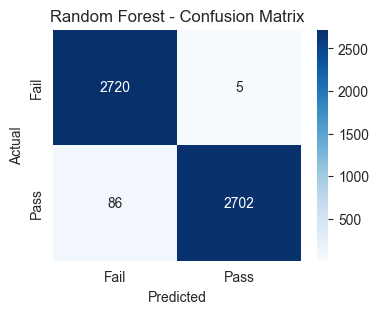

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


def plot_confusion(y_true, y_pred, model_name='Model'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


# Example usage:
plot_confusion(y_test, y_pred, model_name='Random Forest')


# Method 2: Class Weighting

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [15]:
# Load your dataset
df = pd.read_csv("simulated_rwanda_primary_promotions_1996_2023_V6.csv")


In [16]:
# Define features and labels
subjects = ["Kinyarwanda", "English", "Mathematics", "Science", "Social_Studies", "Creative_Arts"]
grades_input = ["P1", "P2", "P3", "P4", "P5", "P6"]
X = df[[f"{subj}_{grade}" for grade in grades_input for subj in subjects]].values
X_seq = X.reshape(-1, len(grades_input), len(subjects))
y = df["Passed_National_Exam"].astype(int).values

In [17]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_seq, y, test_size=0.2, random_state=42, stratify=y
)


In [18]:
# Calculate class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

In [19]:
class_weights_dict = dict(enumerate(class_weights))

# LSTM Model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(X_seq.shape[1], X_seq.shape[2])),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [20]:
# Compile & train with class weights
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2,
          class_weight=class_weights_dict)


Epoch 1/30
307/307 [==============================] - 5s 10ms/step - loss: 0.4263 - accuracy: 0.8517 - val_loss: 0.3024 - val_accuracy: 0.8940
Epoch 2/30
307/307 [==============================] - 3s 10ms/step - loss: 0.2681 - accuracy: 0.8940 - val_loss: 0.2495 - val_accuracy: 0.9030
Epoch 3/30
307/307 [==============================] - 2s 7ms/step - loss: 0.2354 - accuracy: 0.8967 - val_loss: 0.2643 - val_accuracy: 0.8863
Epoch 4/30
307/307 [==============================] - 2s 8ms/step - loss: 0.2291 - accuracy: 0.9003 - val_loss: 0.1157 - val_accuracy: 0.9523
Epoch 5/30
307/307 [==============================] - 3s 9ms/step - loss: 0.2061 - accuracy: 0.9072 - val_loss: 0.1494 - val_accuracy: 0.9344
Epoch 6/30
307/307 [==============================] - 3s 10ms/step - loss: 0.1933 - accuracy: 0.9104 - val_loss: 0.0957 - val_accuracy: 0.9596
Epoch 7/30
307/307 [==============================] - 3s 10ms/step - loss: 0.1876 - accuracy: 0.9170 - val_loss: 0.2272 - val_accuracy: 0.8956
Ep

In [22]:
# Evaluate
y_pred = (model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred, target_names=['Fail', 'Pass']))

96/96 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

        Fail       0.67      0.98      0.80       310
        Pass       1.00      0.95      0.97      2756

    accuracy                           0.95      3066
   macro avg       0.83      0.96      0.88      3066
weighted avg       0.96      0.95      0.95      3066



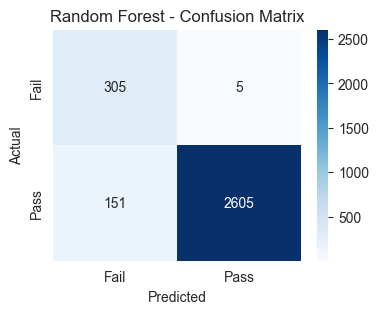

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


def plot_confusion(y_true, y_pred, model_name='Model'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


# Example usage:
plot_confusion(y_test, y_pred, model_name='Random Forest')


# Hyperparameter Tuning + Additional Visualizations

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

In [25]:
# Load data
df = pd.read_csv("simulated_rwanda_primary_promotions_1996_2023_V6.csv")

In [26]:
# Define features and target
subjects = ["Kinyarwanda", "English", "Mathematics", "Science", "Social_Studies", "Creative_Arts"]
grades_input = ["P1", "P2", "P3", "P4", "P5", "P6"]
demo_cols = ["Gender", "School_Location", "Residence_Location", "Has_Electricity", "Parental_Education_Level"]

In [27]:
feature_cols = [f"{subj}_{grade}" for grade in grades_input for subj in subjects] + demo_cols

In [28]:

X = df[feature_cols].copy()
y = df["Passed_National_Exam"].astype(int)

In [29]:
# Encode categorical features
for col in ["Gender", "School_Location", "Residence_Location", "Parental_Education_Level", ]:
    X[col] = LabelEncoder().fit_transform(X[col])


In [30]:
# SMOTE oversampling
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [31]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)


In [32]:
# Hyperparameter grid for Random Forest
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [33]:
# Randomized Search CV
rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(rf, param_distributions=param_dist,
                                   n_iter=20, cv=3, verbose=2, n_jobs=-1, random_state=42)


In [ ]:
# Fit the randomized search model
random_search.fit(X_train, y_train)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [52]:
# Best parameters
print("Best Hyperparameters:", random_search.best_params_)


Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': False}


In [53]:
# Evaluate optimized model
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Fail', 'Pass']))

              precision    recall  f1-score   support

        Fail       0.92      0.95      0.94      2202
        Pass       0.95      0.92      0.94      2252

    accuracy                           0.94      4454
   macro avg       0.94      0.94      0.94      4454
weighted avg       0.94      0.94      0.94      4454



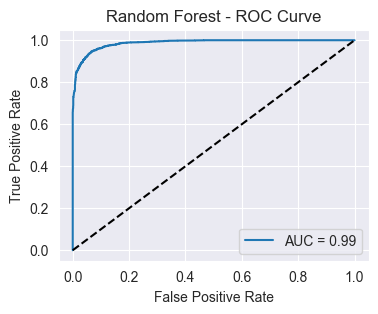

ValueError: in user code:

    File "C:\Python310\lib\site-packages\keras\src\engine\training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "C:\Python310\lib\site-packages\keras\src\engine\training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Python310\lib\site-packages\keras\src\engine\training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Python310\lib\site-packages\keras\src\engine\training.py", line 2381, in predict_step
        return self(x, training=False)
    File "C:\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Python310\lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 6, 6), found shape=(None, 41)


In [63]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


def plot_roc(y_true, y_proba, model_name='Model'):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(4, 3))
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend()
    plt.show()


# For RF:
rf_probs = best_rf.predict_proba(X_test)[:, 1]
plot_roc(y_test, rf_probs, model_name='Random Forest')

# For LSTM:
lstm_probs = model.predict(X_test).ravel()
plot_roc(y_test, lstm_probs, model_name='LSTM')


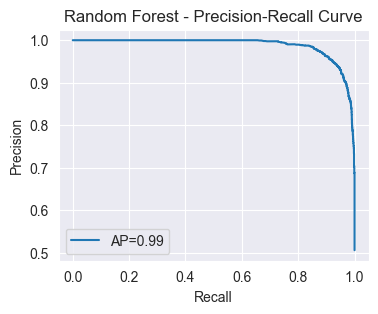

NameError: name 'lstm_probs' is not defined

In [64]:
from sklearn.metrics import precision_recall_curve, average_precision_score


def plot_pr(y_true, y_proba, model_name='Model'):
    precision, recall, _ = precision_recall_curve(y_true, y_proba)
    ap = average_precision_score(y_true, y_proba)
    plt.figure(figsize=(4, 3))
    plt.plot(recall, precision, label=f'AP={ap:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{model_name} - Precision-Recall Curve')
    plt.legend()
    plt.show()


# Usage (as above):
plot_pr(y_test, rf_probs, model_name='Random Forest')
plot_pr(y_test, lstm_probs, model_name='LSTM')


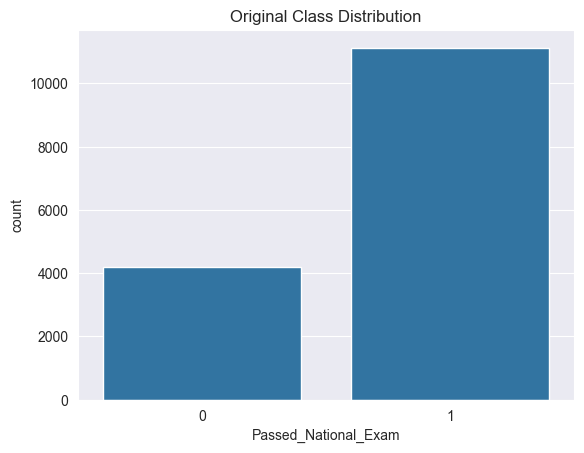

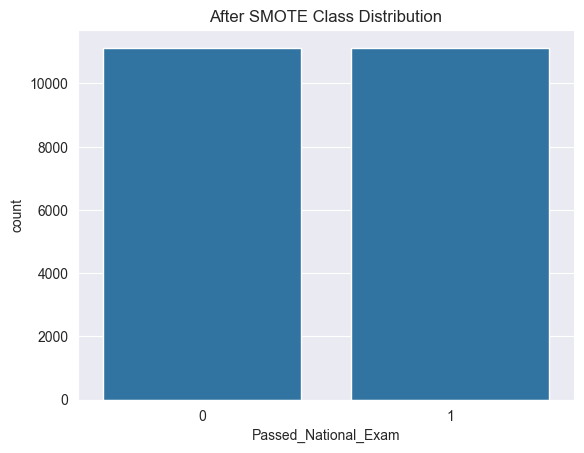

In [61]:
# Before SMOTE
sns.countplot(x=y)
plt.title("Original Class Distribution")
plt.show()

# After SMOTE
sns.countplot(x=y_res)
plt.title("After SMOTE Class Distribution")
plt.show()


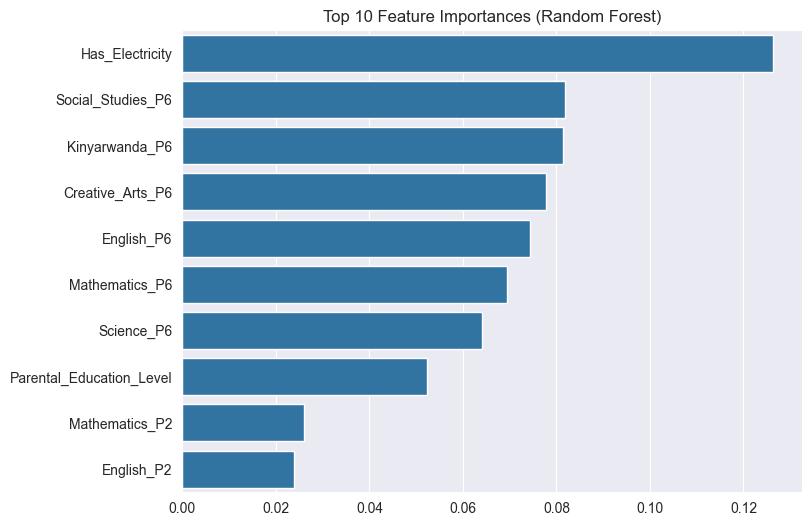

In [59]:
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
top_features = np.array(feature_cols)[indices][:10]

plt.figure(figsize=(8, 6))
sns.barplot(x=importances[indices][:10], y=top_features)
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()
